In [1]:
import os
import glob
import numpy as np
from tifffile import imread, imsave, TiffFile
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageSequence
from PIL import TiffImagePlugin

In [ ]:
o_m = r"C:\Users\Akhlaq\PythonProject\new"
r_m = r"C:\Users\Akhlaq\PythonProject\resized_masks"


new_size = (256,256)
for directory_path in glob.glob(o_m):
    for mask_path in glob.glob(os.path.join(directory_path, "*.tif")):
        imagehandler = Image.open(mask_path)
        pages = []
        for page in ImageSequence.Iterator(imagehandler):
            page = page.resize(new_size, Image.ANTIALIAS)
            image = np.array(page)
            image[image>0] = 255
    
            pages.append(image)
            

        mask = np.array(pages, dtype=np.uint8)    
        name = os.path.basename(mask_path)
        file_name = os.path.join(r_m, name)
        imsave(file_name, mask, dtype=np.uint8)

<ipython-input-12-c729112704c2>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot("61{}".format(i+2))


[  0 255]
[0]
[  0 255]
[0]
[0]


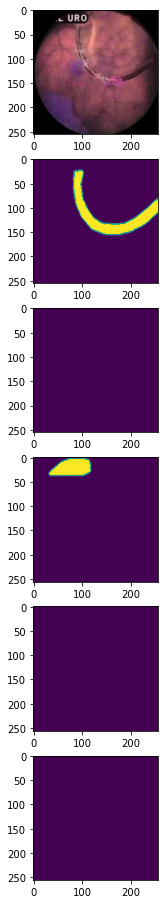

In [12]:
import cv2
i = r"C:\Users\Akhlaq\PythonProject\resized_images\00042.jpg"
m = r"C:\Users\Akhlaq\PythonProject\resized_masks\00042.tif"
plt.figure(figsize=(16,16))
msk = imread(m)
img = cv2.imread(i, 1)
plt.subplot(6,1 ,1)
plt.imshow(img)

for i in range(5):
    plt.subplot("61{}".format(i+2))
    print(np.unique(msk[i]))
    plt.imshow(msk[i])

In [9]:
msk.shape

(5, 512, 512)

In [ ]:
#             imag-1][image[-2]==0] = 0
#     image[-1][image[-2]==0] = 0